<a href="https://colab.research.google.com/github/jakariaemon/ComputerVision/blob/main/mid_term_assignment/cifar10_image_classification_with_sparse_and_adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels)= keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(50000, 1)


In [ ]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

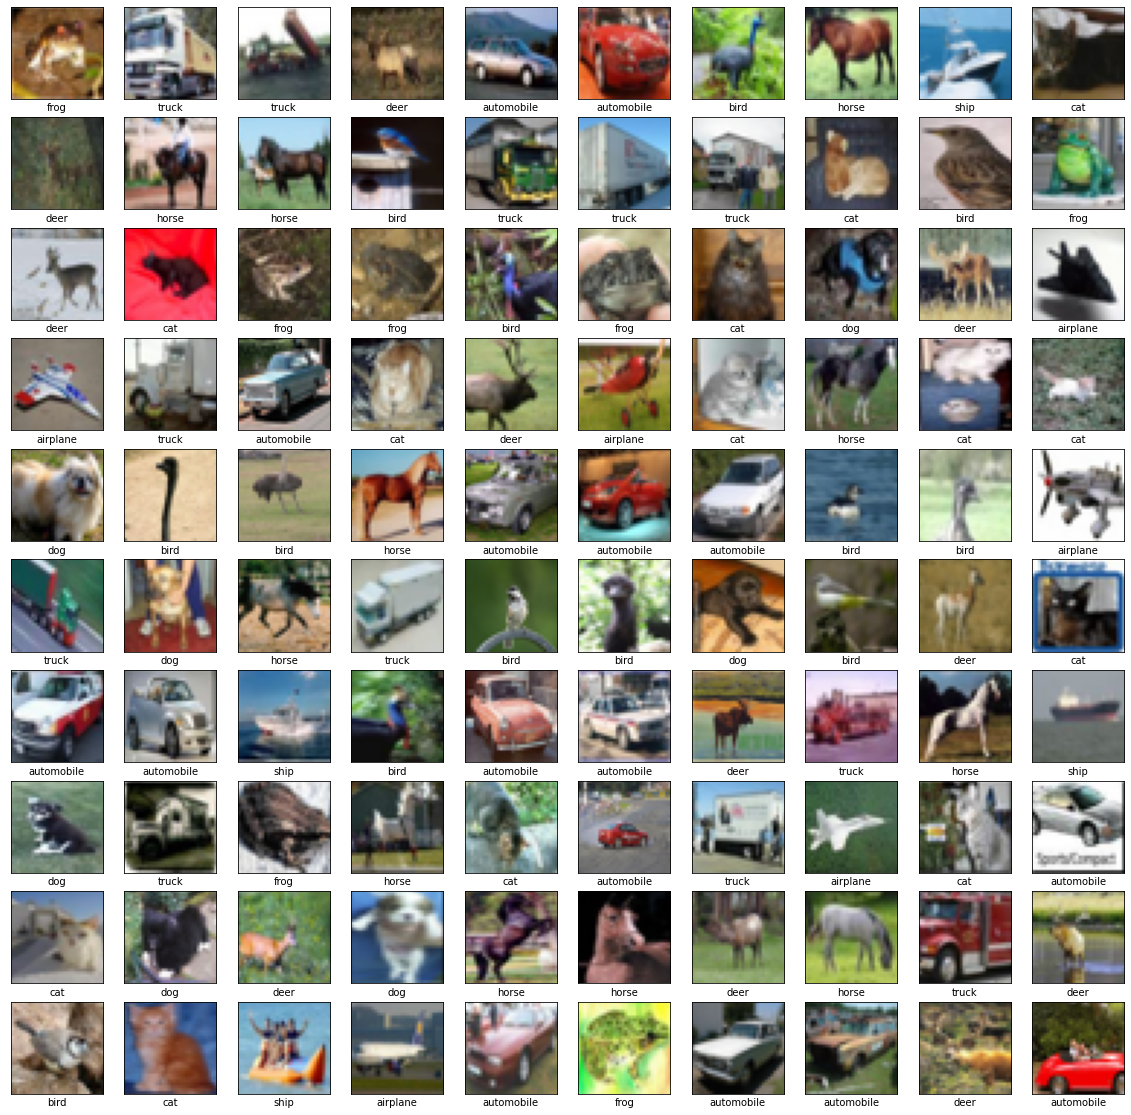

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(train_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(categories[train_labels[i][0]])
plt.show()    

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), 
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.0001),
    loss= keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']

)

In [ ]:
train_images_norm = train_images.astype('float32') / 255.0
test_images_norm = test_images.astype('float32') / 255.0

In [ ]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 56s 197ms/step - loss: 2.0664 - accuracy: 0.2425 - val_loss: 1.8348 - val_accuracy: 0.3372
Epoch 2/10
274/274 [==============================] - 54s 196ms/step - loss: 1.7478 - accuracy: 0.3674 - val_loss: 1.6810 - val_accuracy: 0.3933
Epoch 3/10
274/274 [==============================] - 53s 195ms/step - loss: 1.6266 - accuracy: 0.4120 - val_loss: 1.5795 - val_accuracy: 0.4269
Epoch 4/10
274/274 [==============================] - 53s 194ms/step - loss: 1.5452 - accuracy: 0.4445 - val_loss: 1.5302 - val_accuracy: 0.4460
Epoch 5/10
274/274 [==============================] - 53s 194ms/step - loss: 1.4844 - accuracy: 0.4648 - val_loss: 1.4765 - val_accuracy: 0.4629
Epoch 6/10
274/274 [==============================] - 53s 195ms/step - loss: 1.4328 - accuracy: 0.4876 - val_loss: 1.4332 - val_accuracy: 0.4868
Epoch 7/10
274/274 [==============================] - 53s 195ms/step - loss: 1.3946 - accuracy: 0.5013 - val_loss: 1.3931 - val_ac

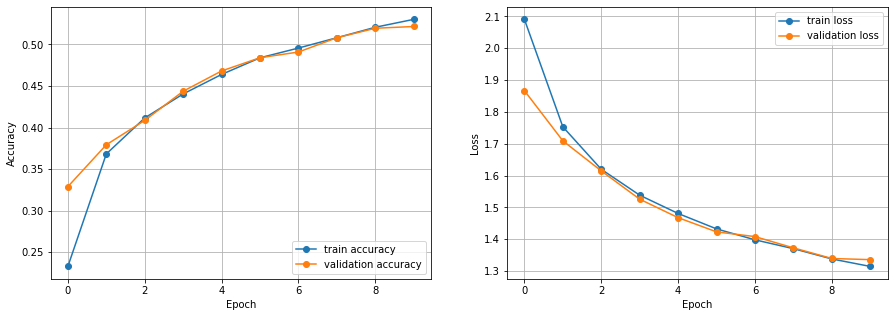

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()
